In [58]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [59]:
df=pd.read_csv("call_volume.csv",parse_dates=True, squeeze=True)
test=pd.read_excel("test.xlsx",parse_dates=True, squeeze=True)

In [60]:
df.head()

Unnamed: 0        Date  No_calls_Offered  ...       tmax       tmin      prec
0           0  2012-01-01        656.327485  ...  52.966183  31.492754  0.021546
1           1  2012-01-02       8645.284667  ...  44.632850  24.748793  0.017488
2           2  2012-01-03       9667.400761  ...  43.567307  21.399038  0.002933
3           3  2012-01-04       6235.026275  ...  49.716347  24.235577  0.012837
4           4  2012-01-05       2084.112419  ...  56.605770  29.653847  0.001346

[5 rows x 15 columns]

In [61]:
test.head()

Date  Offered_Calls
0 2019-09-30            NaN
1 2019-10-01            NaN
2 2019-10-02            NaN
3 2019-10-03            NaN
4 2019-10-04            NaN

In [62]:
df.head()

Unnamed: 0        Date  No_calls_Offered  ...       tmax       tmin      prec
0           0  2012-01-01        656.327485  ...  52.966183  31.492754  0.021546
1           1  2012-01-02       8645.284667  ...  44.632850  24.748793  0.017488
2           2  2012-01-03       9667.400761  ...  43.567307  21.399038  0.002933
3           3  2012-01-04       6235.026275  ...  49.716347  24.235577  0.012837
4           4  2012-01-05       2084.112419  ...  56.605770  29.653847  0.001346

[5 rows x 15 columns]

In [63]:
test['Date'] = pd.to_datetime(test['Date']).dt.date
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Week'] = pd.to_datetime(test['Date']).dt.week
test['Day'] = pd.to_datetime(test['Date']).dt.day
test['WeekDay'] = pd.to_datetime(test['Date']).dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
df.head()

Unnamed: 0        Date  No_calls_Offered  ...       tmax       tmin      prec
0           0  2012-01-01        656.327485  ...  52.966183  31.492754  0.021546
1           1  2012-01-02       8645.284667  ...  44.632850  24.748793  0.017488
2           2  2012-01-03       9667.400761  ...  43.567307  21.399038  0.002933
3           3  2012-01-04       6235.026275  ...  49.716347  24.235577  0.012837
4           4  2012-01-05       2084.112419  ...  56.605770  29.653847  0.001346

[5 rows x 15 columns]

In [65]:
df.describe()

Unnamed: 0  No_calls_Offered  ...         tmin         prec
count  2738.000000       2738.000000  ...  2738.000000  2738.000000
mean   1368.500000       3690.356597  ...    46.329289     0.101890
std     790.536843       2416.314739  ...    15.302511     0.069964
min       0.000000        227.050234  ...     7.224390     0.001346
25%     684.250000       2061.621653  ...    33.291399     0.047458
50%    1368.500000       3010.135749  ...    46.995239     0.089031
75%    2052.750000       4694.192627  ...    61.279457     0.141825
max    2737.000000      11071.761271  ...    70.227196     0.457608

[8 rows x 14 columns]

In [66]:
df.shape

(2738, 15)

In [67]:
df.columns

Index(['Unnamed: 0', 'Date', 'No_calls_Offered', 'Year', 'Week', 'Day',
       'WeekDay', 'Month', 'SpecialDay', 'Weekend', 'isHoliday', 'key', 'tmax',
       'tmin', 'prec'],
      dtype='object')

In [68]:
df.nunique()

Unnamed: 0          2738
Date                2738
No_calls_Offered    2738
Year                   8
Week                  53
Day                   31
WeekDay                7
Month                 12
SpecialDay             2
Weekend                2
isHoliday              2
key                   41
tmax                2688
tmin                2664
prec                2675
dtype: int64

In [69]:
df['Year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [70]:
#cleaning the data

In [71]:
df.isnull().sum()

Unnamed: 0          0
Date                0
No_calls_Offered    0
Year                0
Week                0
Day                 0
WeekDay             0
Month               0
SpecialDay          0
Weekend             0
isHoliday           0
key                 0
tmax                0
tmin                0
prec                0
dtype: int64

In [72]:
#so there is no null values in our dataset

Relationship analysis

In [73]:
correlation=df.corr()

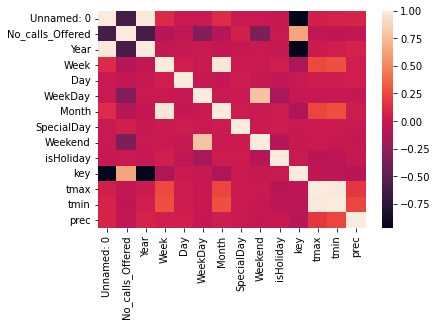

In [74]:
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)

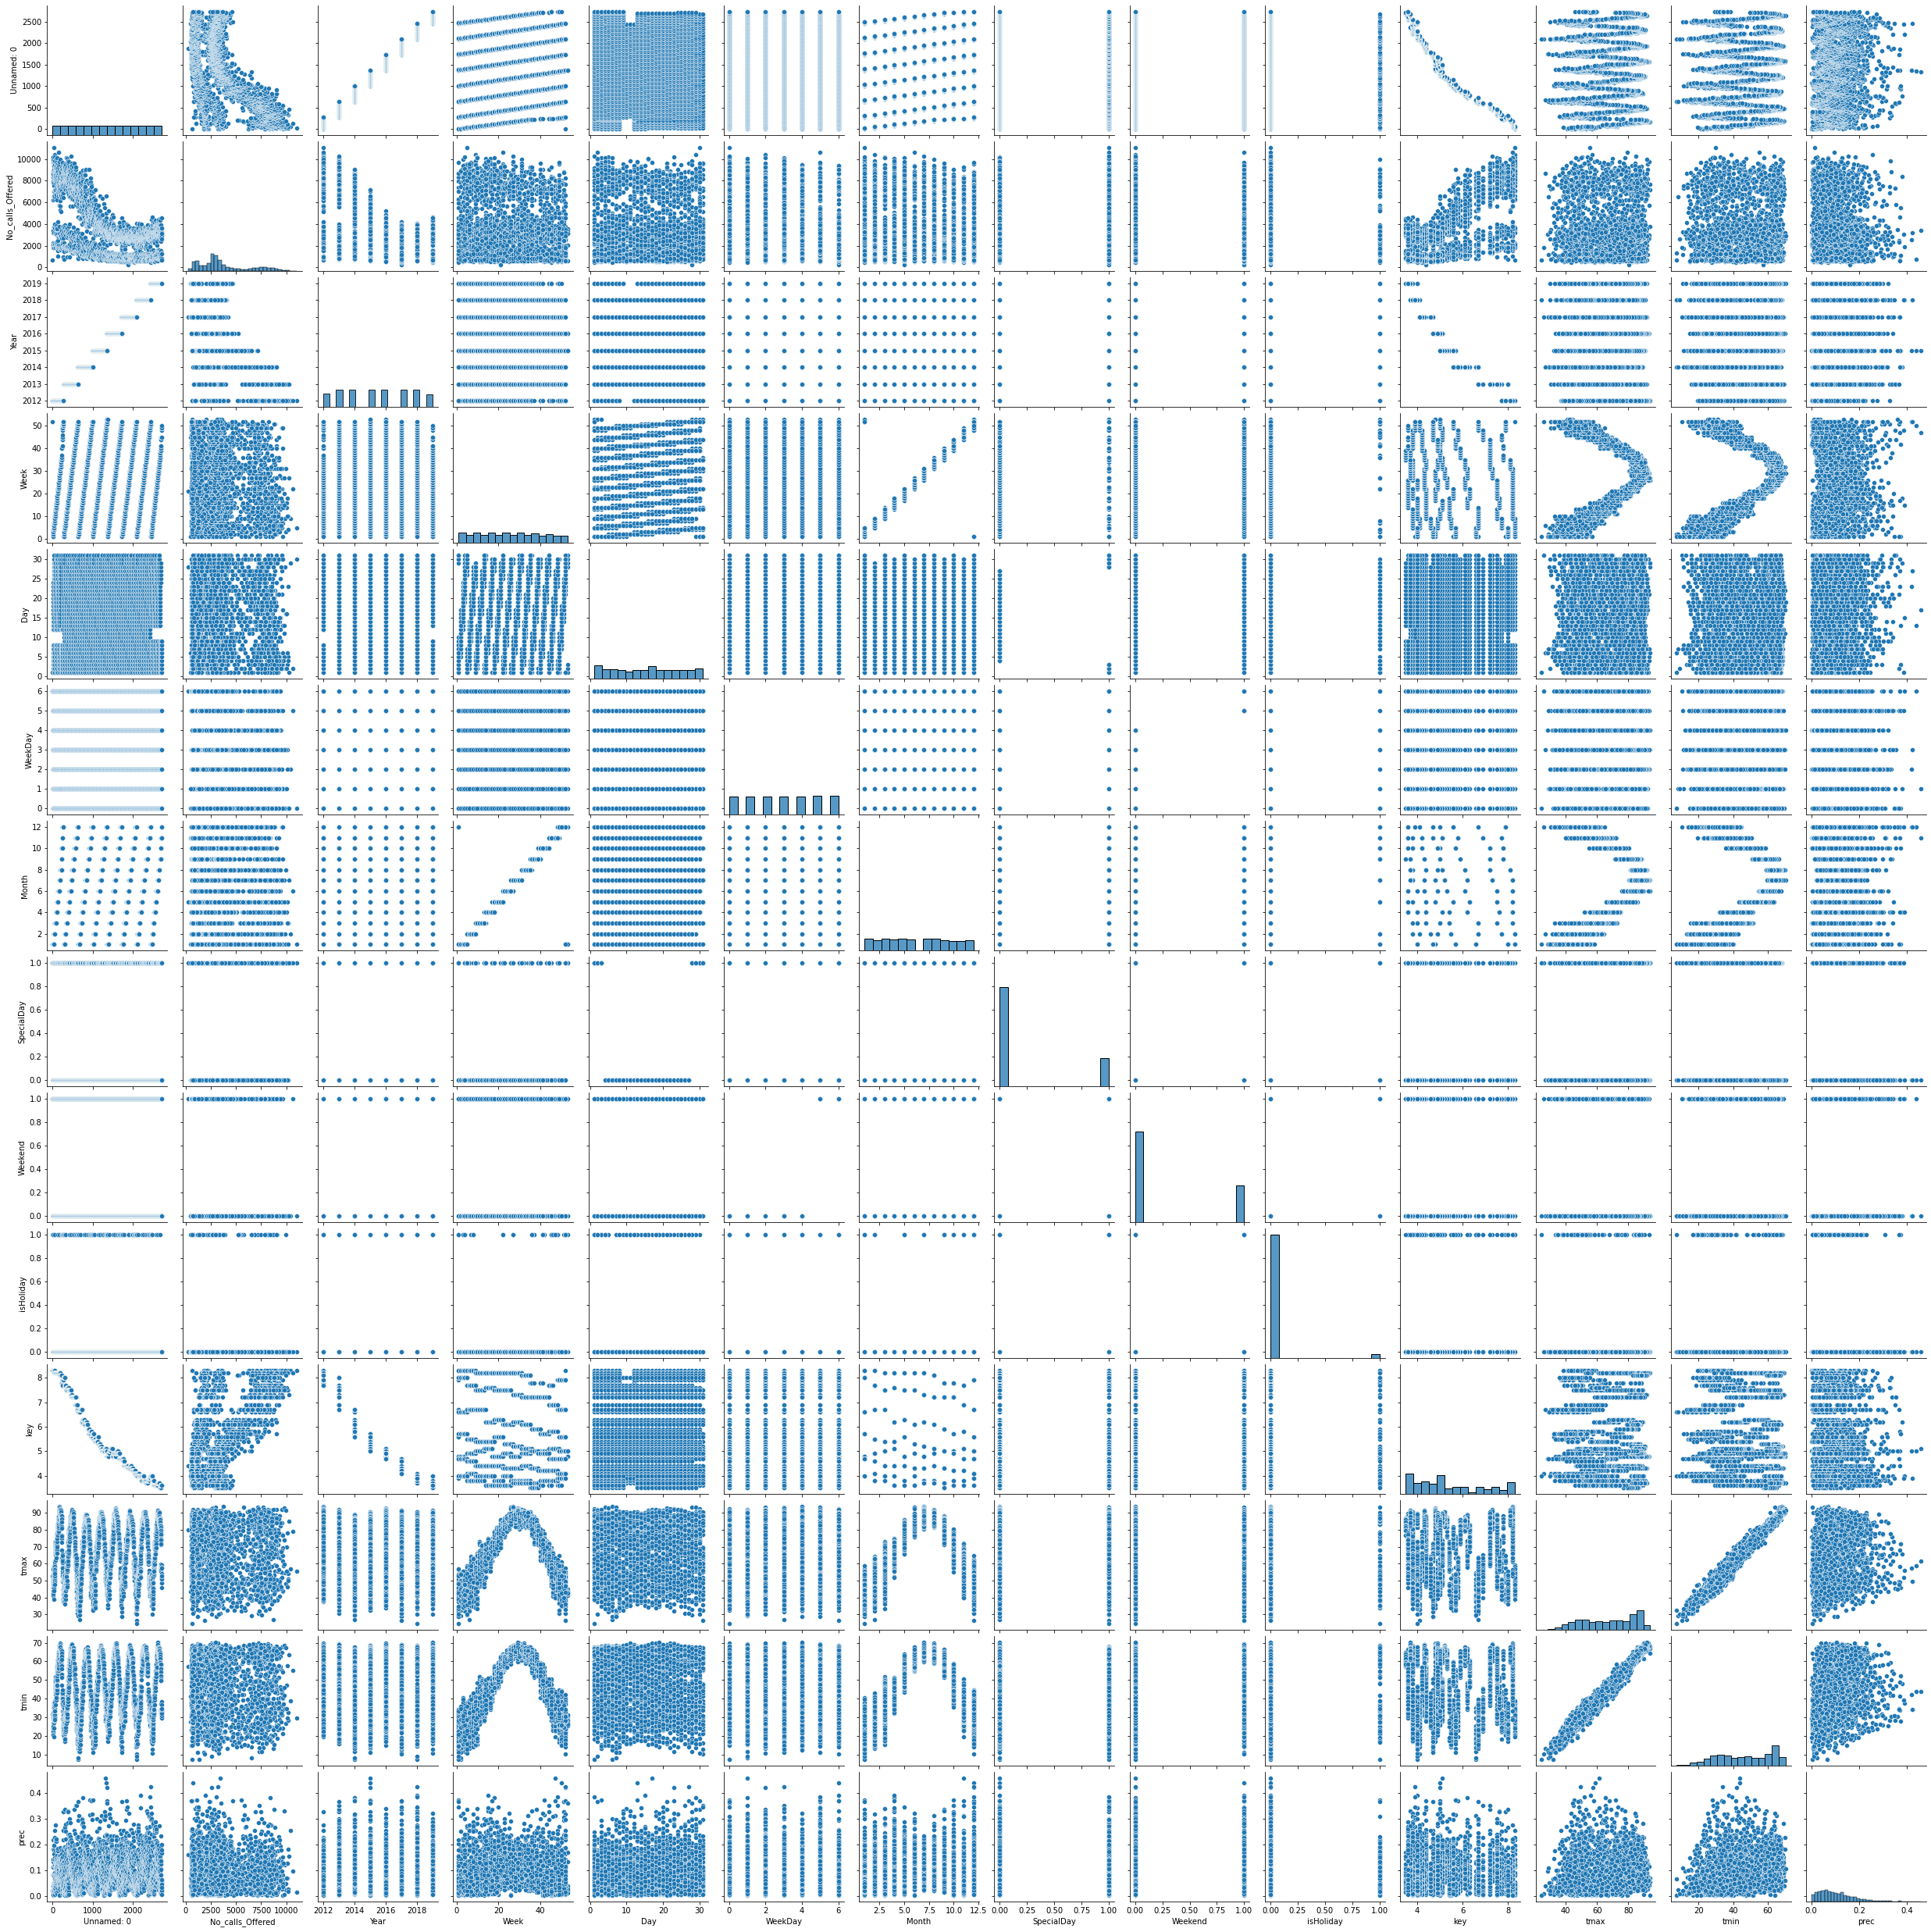

In [75]:
sns.pairplot(df)

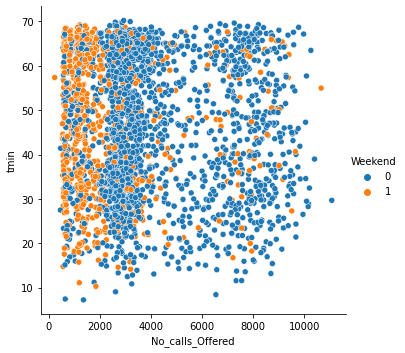

In [76]:
sns.relplot(x='No_calls_Offered',y='tmin',hue='Weekend',data=df)

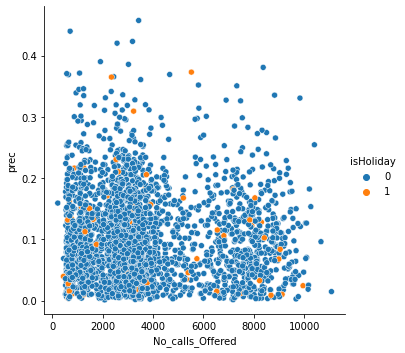

In [77]:
sns.relplot(x='No_calls_Offered',y='prec',hue='isHoliday',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


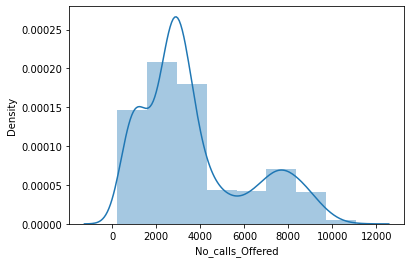

In [78]:
sns.distplot(df['No_calls_Offered'],bins=8)

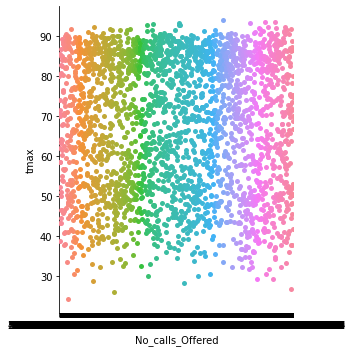

In [57]:
sns.catplot(x='No_calls_Offered',y='tmax',data=df)

In [79]:
event_dictionary ={ 1 : 1.176, 2 : 1.107, 3 : 1.069, 4 : 1.037, 5 : 0.991, 6 : 0.971 , 7 : 0.973, 8 : 0.978 , 9
                  : 0.977, 10 : 0.983 , 11 : 1.009 , 12 : 1.009, 13 : 1.022,  14 : 1.000, 15: 0.983 , 16 : 0.976
                  ,17: 0.957, 18 : 0.933, 19 : 0.924 , 20 : 0.918 , 21 : 0.928 , 22 : 0.931 , 23 : 0.931 , 24 : 0.935
                  ,25 : 0.945, 26 : 0.956 , 27 : 0.976, 28 : 1.010, 29 : 1.074 , 30 : 1.172, 31 : 1.222}

In [80]:
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 

In [81]:
df['Weights'] = df['Day'].apply(set_value, args =(event_dictionary, )) 
test['Weights'] = test['Day'].apply(set_value, args =(event_dictionary, )) 

In [82]:
df.head()

Unnamed: 0        Date  No_calls_Offered  ...       tmin      prec  Weights
0           0  2012-01-01        656.327485  ...  31.492754  0.021546    1.176
1           1  2012-01-02       8645.284667  ...  24.748793  0.017488    1.107
2           2  2012-01-03       9667.400761  ...  21.399038  0.002933    1.069
3           3  2012-01-04       6235.026275  ...  24.235577  0.012837    1.037
4           4  2012-01-05       2084.112419  ...  29.653847  0.001346    0.991

[5 rows x 16 columns]

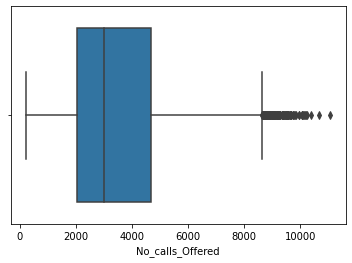

In [83]:
import seaborn as sns
sns.boxplot(x=df['No_calls_Offered'])

In [84]:
df.No_calls_Offered.quantile([0.25,0.5,0.75])

0.25    2061.621653
0.50    3010.135749
0.75    4694.192627
Name: No_calls_Offered, dtype: float64

[array([2061.62165345,  227.05023431]), array([4694.19262734, 8637.09249034])]

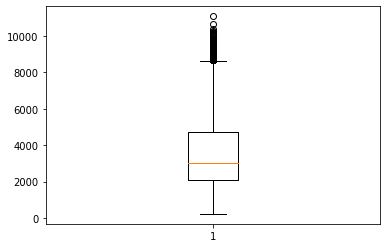

In [85]:
B=plt.boxplot(df['No_calls_Offered'])
[item.get_ydata() for item in B['whiskers']]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


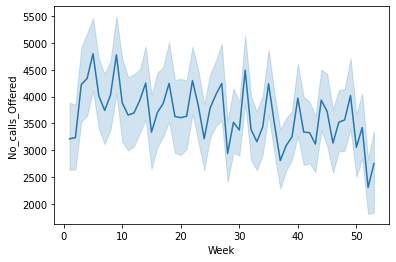

In [86]:
## Week Trends
sns.lineplot(df['Week'],df['No_calls_Offered'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


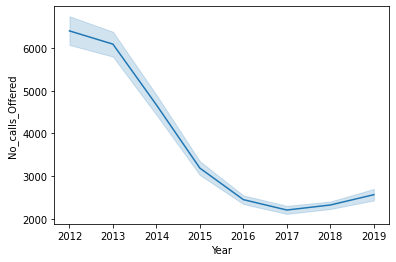

In [87]:
#Yearly Trend
sns.lineplot(df['Year'],df['No_calls_Offered'])

In [88]:
df=df[df['No_calls_Offered']<8837]

In [89]:
df["Date"] = pd.to_datetime(df["Date"])
test["Date"] = pd.to_datetime(test["Date"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
df_mon=df[(df['Date'] > '2013-01-01')]

In [91]:
df_mon.head()

Unnamed: 0       Date  No_calls_Offered  ...       tmin      prec  Weights
276         276 2013-01-02       7410.056598  ...  21.714975  0.015266    1.107
277         277 2013-01-03       8661.966923  ...  19.894230  0.017115    1.069
278         278 2013-01-04       1845.548005  ...  21.765550  0.007129    1.037
279         279 2013-01-05       2002.574208  ...  22.628020  0.030773    0.991
280         280 2013-01-06       3642.149349  ...  25.942308  0.026875    0.971

[5 rows x 16 columns]

In [92]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [93]:
#Breaking the data and selecting features , predictors
from sklearn.model_selection import train_test_split
predictors=df_mon.drop(['No_calls_Offered','Date'],axis=1)
target=df_mon['No_calls_Offered']
x_train,x_cv,y_train,y_cv=train_test_split(predictors,target,test_size=0.2,random_state=42)

In [94]:
#Comparing Algorithms
def scores(i):
    lin = i()
    lin.fit(x_train, y_train)
    y_pred=lin.predict(x_cv)
    lin_r= r2_score(y_cv, y_pred)
    s.append(lin_r)
#Checking the scores by using our function
algos=[LinearRegression,KNeighborsRegressor,RandomForestRegressor,Lasso,ElasticNet,DecisionTreeRegressor]
s=[]
for i in algos:
    scores(i)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.962e+09, tolerance: 7.989e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [95]:
#Checking the score
models = pd.DataFrame({
    'Method': ['LinearRegression', 'KNeighborsRegressor', 
              'RandomForestRegressor', 'Lasso','DecisionTreeRegressor'],
    'Score': [s[0],s[1],s[2],s[3],s[4]]})
models.sort_values(by='Score', ascending=False)

Method     Score
2  RandomForestRegressor  0.570486
0       LinearRegression  0.449387
3                  Lasso  0.439735
4  DecisionTreeRegressor  0.381848
1    KNeighborsRegressor  0.239286

In [96]:
#Hypertuned Model
model = RandomForestRegressor(oob_score = True,n_jobs =1,random_state =7,
                              max_features = "auto", min_samples_leaf =4)

In [97]:
model.fit(x_train,y_train)

RandomForestRegressor(min_samples_leaf=4, n_jobs=1, oob_score=True,
                      random_state=7)

In [98]:
pred=model.predict(x_cv)

In [99]:
#R2 Score
r2_score(pred,y_cv)

0.4006193227733078

In [100]:
import numpy as np

def mean_absolute_percentage_error(y_cv, pred): 
    y_cv, pred = np.array(y_cv), np.array(pred)
    return np.mean(np.abs((y_cv - pred) / y_cv)) * 100

In [101]:
mean_absolute_percentage_error(y_cv, pred)

38.80094224449161

In [102]:
test.head()

Date  Offered_Calls  Year  Week  Day  WeekDay  Weights
0 2019-09-30            NaN  2019    40   30        0    1.172
1 2019-10-01            NaN  2019    40    1        1    1.176
2 2019-10-02            NaN  2019    40    2        2    1.107
3 2019-10-03            NaN  2019    40    3        3    1.069
4 2019-10-04            NaN  2019    40    4        4    1.037

In [103]:
test.head()

Date  Offered_Calls  Year  Week  Day  WeekDay  Weights
0 2019-09-30            NaN  2019    40   30        0    1.172
1 2019-10-01            NaN  2019    40    1        1    1.176
2 2019-10-02            NaN  2019    40    2        2    1.107
3 2019-10-03            NaN  2019    40    3        3    1.069
4 2019-10-04            NaN  2019    40    4        4    1.037

In [104]:
test1=test.drop(['Offered_Calls','Date'],axis=1)

In [105]:
pred2=model.predict(test1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Month
- SpecialDay
- Unnamed: 0
- Weekend
- isHoliday
- ...

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
test['No_calls_Offered']=pred2

In [ ]:
test.head()

In [ ]:
result=df[['Date','Offered_Calls']]

In [ ]:
result.to_csv('finalresult.csv')